# PREDICTING EMPLOYEE BURNOUT

The dataset used in this project was retrieved from a Hackerearth competition: "HackerEarth Machine Learning Challenge: Are your employees burning out?". The dataset consists of 22,750 individual employees along with 7 potential preditictive variables + employee's unique ID. 

There are two goals I hope to achieve here:

-Evaluating the importance of the given features in predicting employee burn rate. 

-Creating a model that best predicts an employee burnout, with the given features.

In [1]:
import numpy as np
import pandas as pd

In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od

In [4]:
dataset="https://www.kaggle.com/datasets/blurredmachine/are-your-employees-burning-out"

In [5]:
od.download(dataset)

Skipping, found downloaded files in ".\are-your-employees-burning-out" (use force=True to force download)


In [6]:
import os

In [7]:
data_dir=".\\are-your-employees-burning-out"

In [8]:
os.listdir(data_dir)

['.ipynb_checkpoints', 'sample_submission.csv', 'test.csv', 'train.csv']

In [9]:
data_filename=data_dir + '/train.csv'

In [10]:
df=pd.read_csv(data_filename)

In [11]:
df

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1.0,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3.0,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3.0,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2.0,5.0,5.9,0.52


In [12]:
df.dtypes

Employee ID              object
Date of Joining          object
Gender                   object
Company Type             object
WFH Setup Available      object
Designation             float64
Resource Allocation     float64
Mental Fatigue Score    float64
Burn Rate               float64
dtype: object

Employee ID: The unique ID allocated for each employee (example: fffe390032003000)

Date of Joining: The date-time when the employee joined the organization (example: 2008-12-30)

Gender: The gender of the employee (Male/Female)

Company Type: The type of company where the employee works (Service/Product)

WFH Setup Available: Is the work from home facility available to the employee (Yes/No)

Designation: The designation of the employee of work in the organization.
In the range of [0.0, 5.0] bigger is higher designation/seniority.

Resource Allocation: Number of working hours.
In the range of [1.0, 10.0] (higher means more resource)

Mental Fatigue Score: The level of fatigue mentally the employee is facing.
In the range of [0.0, 10.0] where 0.0 means no fatigue and 10.0 means completely fatigue. This is self reported.

Burn Rate: The value we need to predict for each employee telling the rate of Burn out while working.
In the range of [0.0, 1.0] where the higher the value is more is the burn out.

# DATA CLEANING

#Find any Duplicates in the DATA

In [13]:
df.duplicated(subset=['Employee ID']).any()

False

In [14]:
df.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


#Change DataTypes

The datetime of joining will not be a useful variable in creating a model unless it becomes a retention metric, i.e: how long has an employee been with the company? For this matter we will transform this object into an int type that tells you the tenure of the employee. We will assume that the last date recorded to be day 1 of tenure. 

In [15]:
import datetime as dt
df['Date of Joining']= pd.to_datetime(df['Date of Joining'])

#find the latest date in dataframe and set that to be day 1 of tenure
df["max_date"]=max(df['Date of Joining'])
df["max_date"] =  pd.to_datetime(df["max_date"])

#find tenure days
df['Tenure'] = df['max_date'] - df["Date of Joining"]
df['Tenure']=df['Tenure'].dt.days

#drop unnecessary columns
df=df.drop(['Date of Joining', 'max_date'], axis=1)



# EDA

Questions to ask as we analyze Data:

-Is there any difference in the burn rate of employees who have the option to work from home and those who do not?

-Is there any difference in the burn rate of employees who work for a service company and those who do not?

-Are employees who are at work the longest assigned the most work? Are they the ones experiencing the most burn rate? This is an evaluation of resource allocation(work hours) vs designation of work.

-Do the employees who have the same designation of work/or who work the same numbers report the same or roughly the same mental fatigue score?

-Does Gender matter in terms of burn rate?

-Are employees who have worked longer experience more burn rate or less? What is the trend in terms of tenure?

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns 

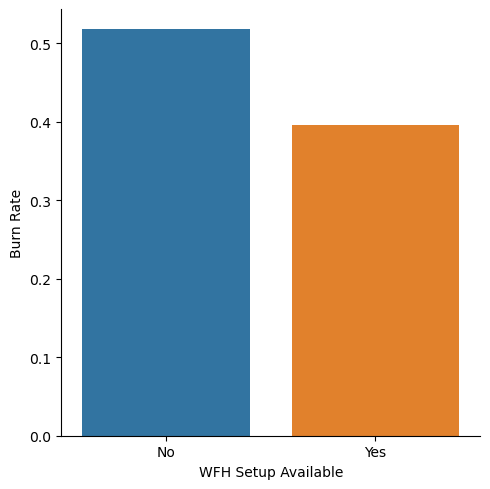

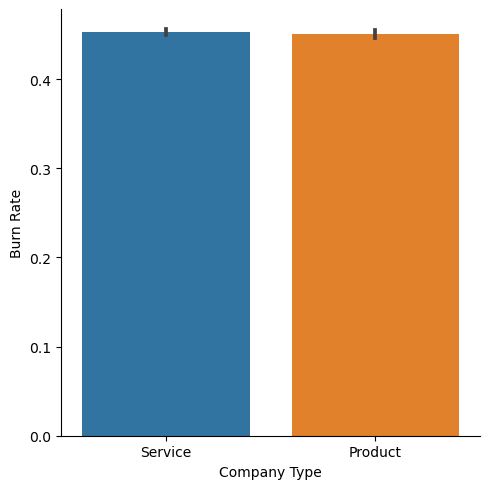

In [17]:
sns.catplot(x='WFH Setup Available', y='Burn Rate', data=df, kind='bar', ci=None)
plt.show()
sns.catplot(x='Company Type', y='Burn Rate', data=df, kind='bar') 
plt.show()

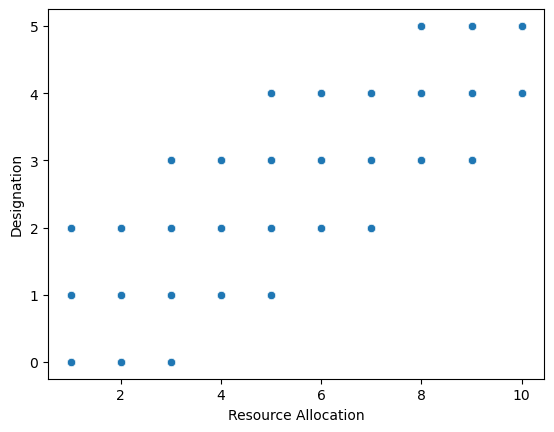

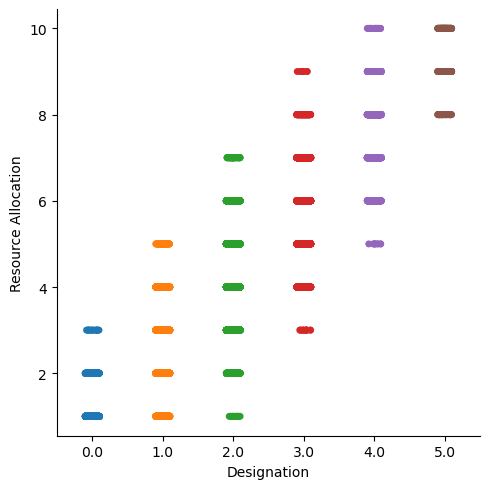

In [18]:
sns.scatterplot(data=df, x="Resource Allocation", y="Designation")
sns.catplot(data=df, x="Designation", y="Resource Allocation")
plt.show()

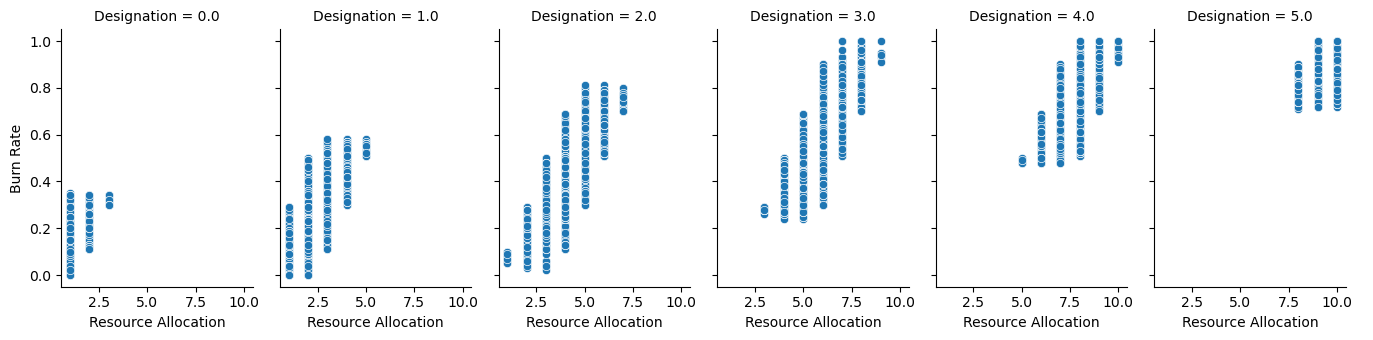

In [19]:
g = sns.FacetGrid(data=df, col="Designation", height=3.5, aspect=.65)
g.map_dataframe(sns.scatterplot, x="Resource Allocation", y="Burn Rate")
g.add_legend()
plt.show()

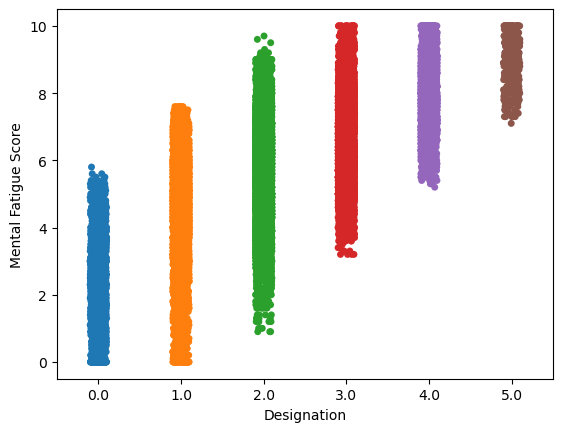

In [20]:
sns.stripplot(data=df, y="Mental Fatigue Score", x="Designation")
plt.show()

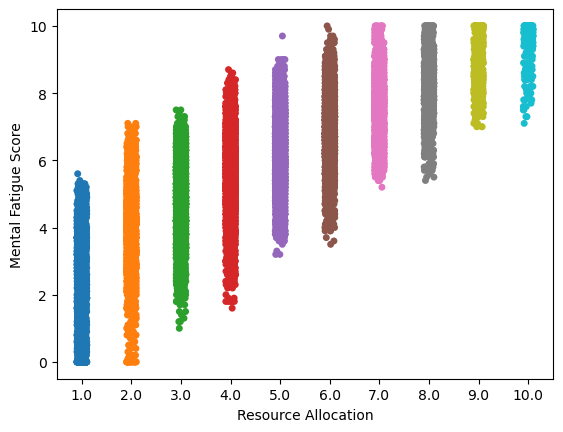

In [21]:
sns.stripplot(data=df, y="Mental Fatigue Score", x="Resource Allocation")
plt.show()

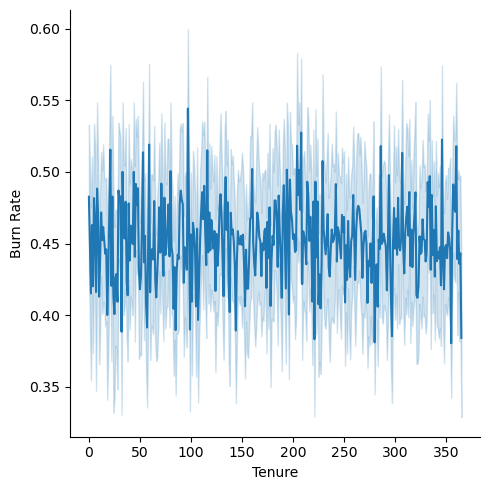

In [22]:
sns.relplot(data= df, x="Tenure", y="Burn Rate", kind="line")
plt.show()

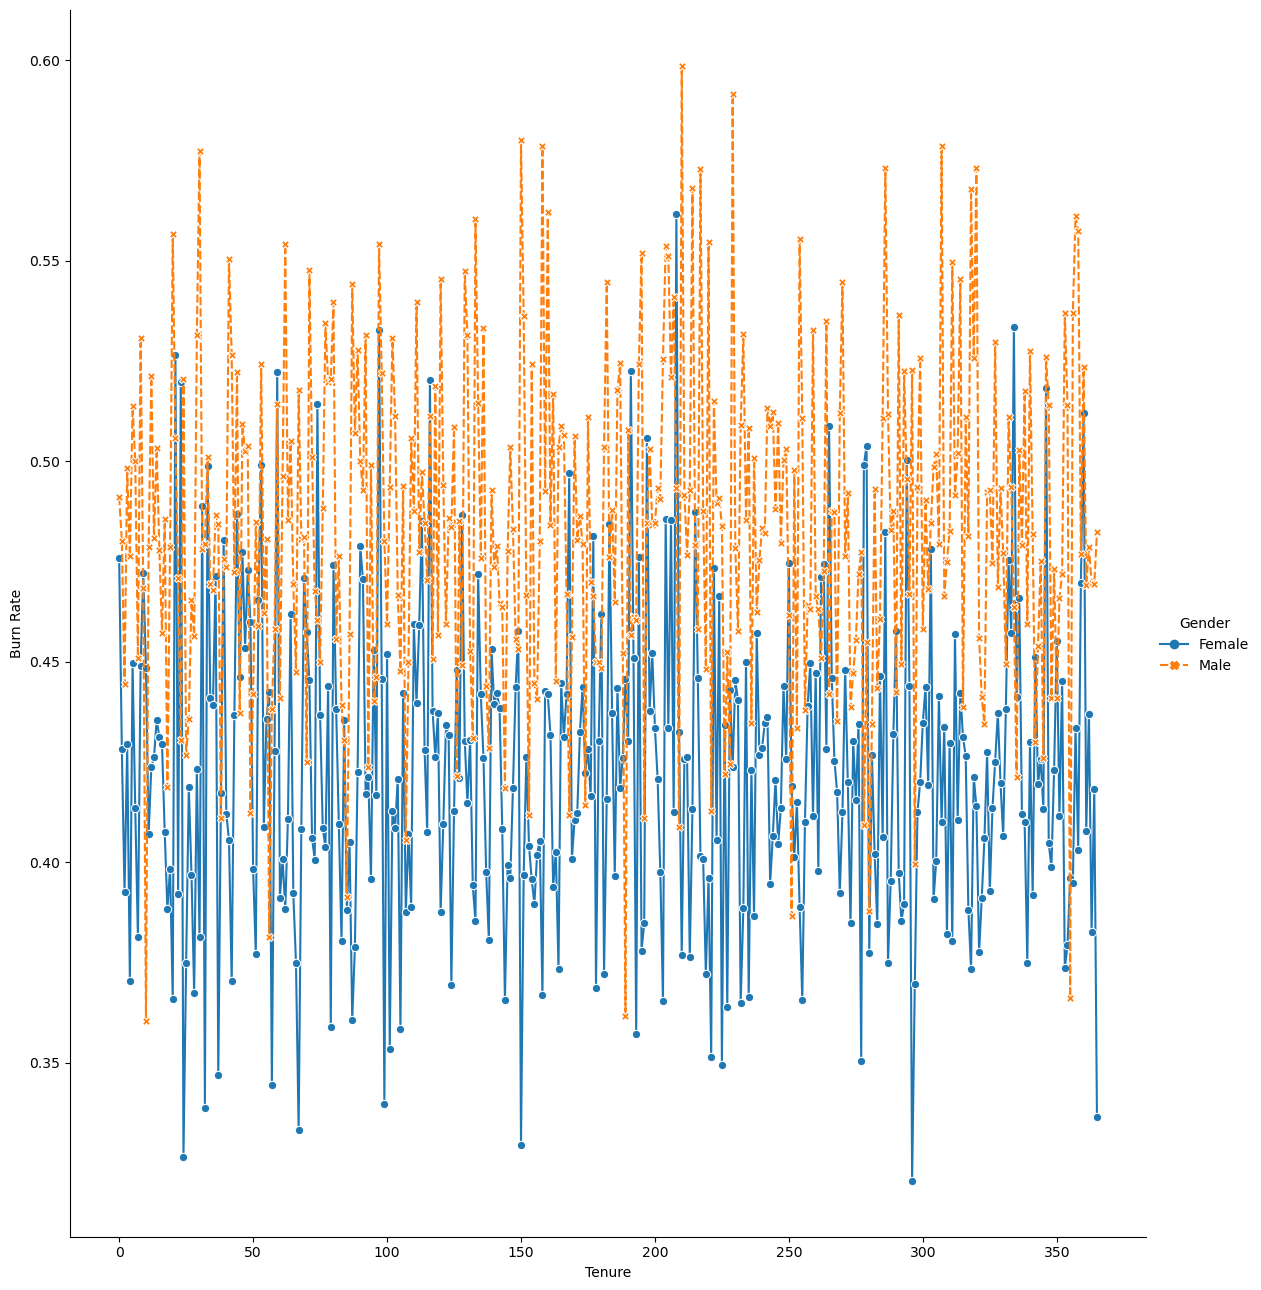

In [23]:
sns.relplot(data=df, x="Tenure", y="Burn Rate", kind='line', hue='Gender', style='Gender',height=13, aspect=0.9,markers=True, ci=None)
plt.show()

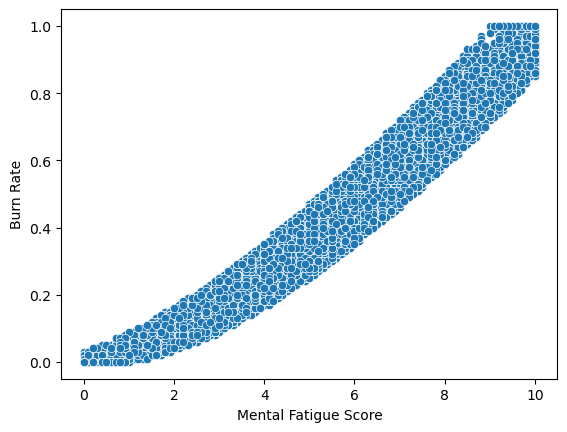

In [24]:
sns.scatterplot(data=df, x='Mental Fatigue Score', y='Burn Rate' )
plt.show()

In [25]:
df.isna().sum()

Employee ID                0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
Tenure                     0
dtype: int64

In [26]:
#imputation by filling missing values with the mean of the column

# Create a copy of the original dataframe to store the imputed values
df_imputed = df.copy()

# Iterate through each column in the dataframe
for col in df.columns:
    # Check if the column has missing values
    if df[col].isnull().any():
        # Store the mean value of the non-missing values
        mean_val = df[col].mean()
        # Replace the missing values with the mean value
        df_imputed[col].fillna(mean_val, inplace=True)

# one-hot Encoding

In [27]:
df_imputed['Gender']= pd.get_dummies(df_imputed.Gender, drop_first=True)
df_imputed['Company Type'] = pd.get_dummies(df_imputed["Company Type"], drop_first=True)
df_imputed['WFH Setup Available'] = pd.get_dummies(df_imputed["WFH Setup Available"], drop_first=True)

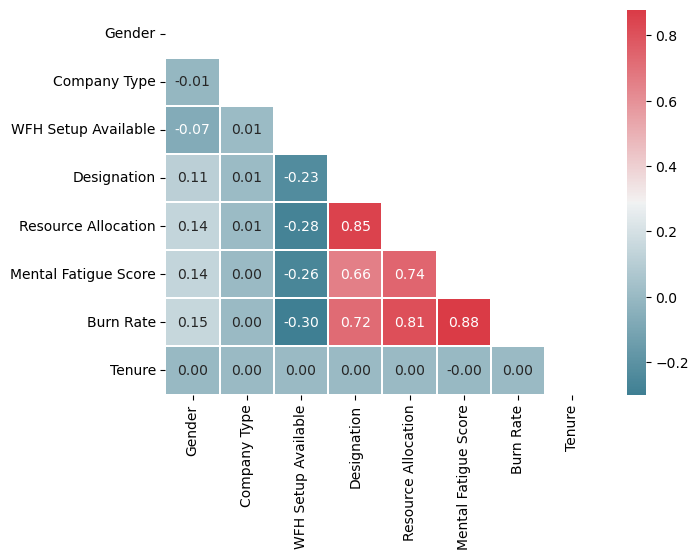

In [28]:
corr = df_imputed.corr()
fig, ax = plt.subplots(figsize=(7, 5))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
dropvals = np.zeros_like(corr)
dropvals[np.triu_indices_from(dropvals)] = True
sns.heatmap(corr, cmap = colormap, linewidths = .2, annot = True, fmt = ".2f", mask = dropvals)
plt.show()

In [29]:
df_imputed=df_imputed.drop(['Employee ID'] , axis=1)

In [30]:
df_imputed

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Tenure
0,0,1,0,2.0,3.000000,3.800000,0.16,92
1,1,1,1,1.0,2.000000,5.000000,0.36,31
2,0,0,1,2.0,4.481398,5.800000,0.49,296
3,1,1,1,1.0,1.000000,2.600000,0.20,58
4,0,1,0,3.0,7.000000,6.900000,0.52,160
...,...,...,...,...,...,...,...,...
22745,0,1,0,1.0,3.000000,5.728188,0.41,1
22746,0,0,1,3.0,6.000000,6.700000,0.59,347
22747,1,1,1,3.0,7.000000,5.728188,0.72,56
22748,0,1,0,2.0,5.000000,5.900000,0.52,356


Create a function that splits data into k-folds and trains it with multiple ML models recursively. Predict them and Evaluate model performances using MSE, MAE, R2 and cross validation scores and return them.

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import time as T

In [32]:
!pip install scikit-optimize

In [33]:
!pip install xgboost

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from scipy.stats import uniform, randint

In [35]:
X=df_imputed.drop(["Burn Rate"], axis=1)
y=df_imputed["Burn Rate"]
# Load the data and split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parameter-tuning and training


In [36]:
# Set up the models to be trained and tuned
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "Extreme Gradient Boosting" : xgb.XGBRegressor(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    
}

# Define the hyperparameter distributions for each model
param_distributions = {
    "Linear Regression": {},
    "Decision Tree Regressor": {"max_depth": randint(1, 50), "min_samples_split": uniform(0.01, 0.99)},
    "KNeighborsRegressor":{'n_neighbors': randint(1, 20),'weights': ['uniform', 'distance'],'leaf_size': randint(10, 100),'p': [1, 2, 3, 4]},
    "Random Forest Regressor": {'n_estimators': randint(10, 1000), 'max_depth': randint(1, 50), 'min_samples_split': uniform(0.01, 0.99)},
    "Gradient Boosting Regressor": {"n_estimators": randint(10, 1000), "max_depth": randint(1, 50), "min_samples_split": uniform(0.01, 0.99)},
    "Extreme Gradient Boosting" :{ 'learning_rate': [0.01, 0.1, 0.3],'max_depth': randint(1,50),'n_estimators': randint(10,1000)},
    #"SVR": {"C": uniform(0.1, 10), "gamma": ["scale", "auto"], "kernel": ["linear", "poly", "rbf", "sigmoid"]},
    "Lasso": {"alpha": uniform(0.1, 10)},
    "ElasticNet": {"alpha": uniform(0.1, 10), "l1_ratio": uniform(0, 1)}
    
}

best_params = {}
results = []



# Train and tune the models using random search
for name, model in models.items():
    t1=T.time()
    print("Training and tuning", name)
    search = RandomizedSearchCV(model, param_distributions[name], n_iter=10, n_jobs=-1, cv=5, random_state=42)
    search.fit(X_train, y_train)
    best_params[name] = search.best_params_
    print("Best parameters:", best_params[name])
    model = model.set_params(**search.best_params_)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results.append((name, r2, mape, mse))
    t2=T.time()
    print("Time taken to train: ", t2-t1)

Training and tuning Linear Regression


C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {}
Time taken to train:  5.869168519973755
Training and tuning Decision Tree Regressor
Best parameters: {'max_depth': 19, 'min_samples_split': 0.10897516665982285}
Time taken to train:  2.324768543243408
Training and tuning KNeighborsRegressor
Best parameters: {'leaf_size': 68, 'n_neighbors': 10, 'p': 4, 'weights': 'distance'}
Time taken to train:  2.186079978942871
Training and tuning Random Forest Regressor
Best parameters: {'max_depth': 22, 'min_samples_split': 0.016995642167520232, 'n_estimators': 866}
Time taken to train:  63.70812964439392
Training and tuning Gradient Boosting Regressor
Best parameters: {'max_depth': 36, 'min_samples_split': 0.15143814974272138, 'n_estimators': 140}
Time taken to train:  107.74242544174194
Training and tuning Extreme Gradient Boosting
Best parameters: {'learning_rate': 0.01, 'max_depth': 33, 'n_estimators': 469}
Time taken to train:  237.7411572933197
Training and tuning Lasso
Best parameters: {'alpha': 3.845401188473625}
Time ta

In [37]:
# Create a pandas DataFrame from the results list
columns = ["Model", "R2", "MAPE", "MSE"]
df_results = pd.DataFrame(results, columns=columns)

# Print the results table
print(df_results)

                         Model        R2          MAPE       MSE
0            Linear Regression  0.830452  3.001545e+12  0.006103
1      Decision Tree Regressor  0.816903  5.700052e+12  0.006591
2          KNeighborsRegressor  0.804334  5.820061e+12  0.007043
3      Random Forest Regressor  0.856091  3.426807e+12  0.005180
4  Gradient Boosting Regressor  0.859906  2.682270e+12  0.005043
5    Extreme Gradient Boosting  0.812488  2.991010e+12  0.006749
6                        Lasso -0.000006  2.505927e+13  0.035995
7                   ElasticNet  0.217494  2.175876e+13  0.028166


In [44]:
classifiers = [LinearRegression()]

for name, params in best_params.items():
    if name == 'Decision Tree Regressor':
        model = DecisionTreeRegressor(max_depth=params['max_depth'], min_samples_split=params['min_samples_split'])
    elif name == 'Random Forest Regressor':
        model = RandomForestRegressor(max_depth=params['max_depth'], min_samples_split=params['min_samples_split'], n_estimators=params['n_estimators'])
    elif name == 'Gradient Boosting Regressor':
        model = GradientBoostingRegressor(max_depth=params['max_depth'], min_samples_split=params['min_samples_split'], n_estimators=params['n_estimators'])
    elif name == 'Extreme Gradient Boosting':
        model = xgb.XGBRegressor(max_depth=params['max_depth'], n_estimators=params['n_estimators'], learning_rate=params['learning_rate'])
    elif name == 'Lasso':
        model = Lasso(alpha=0.01)
    elif name == 'ElasticNet':
        model = ElasticNet(alpha=0.01, l1_ratio=params['l1_ratio'])
    elif name =='KNeighborsRegressor' :
        model = KNeighborsRegressor(n_neighbors= params['n_neighbors'], weights= params['weights'],  leaf_size= params['leaf_size'], p= params['p'])
    else:
        continue
    
    classifiers.append(model)
    
classifiers.append(SVR())

In [45]:
print(classifiers)

[LinearRegression(), DecisionTreeRegressor(max_depth=19, min_samples_split=0.10897516665982285), KNeighborsRegressor(leaf_size=68, n_neighbors=10, p=4, weights='distance'), RandomForestRegressor(max_depth=22, min_samples_split=0.016995642167520232,
                      n_estimators=866), GradientBoostingRegressor(max_depth=36, min_samples_split=0.15143814974272138,
                          n_estimators=140), XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=33, max_leaves=None,
             min_child_weight=None, missing=

Due to the collinearity of the mental fatigue score and the burn rate, we cannot use it to effectively predict. Thus, I am inclined to drop it to avoid overfitting. We will then re-train using the best parameters using k-fold split this time 

In [46]:
df_imputed=df_imputed.drop(['Mental Fatigue Score'] , axis=1)

In [47]:
def kfold_multiple_ml_algorithms(df, target_column, classifiers, k):
    kf = KFold(n_splits=k)
    scores = {}
    
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    for classifier in classifiers:
        mse_scores = []
        r2_scores = []
        mape_scores = []
        
            
        for train_index, test_index in kf.split(df):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            clf = classifier.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            
            mse_scores.append(mean_squared_error(y_test, y_pred))
            r2_scores.append(r2_score(y_test, y_pred))
            mape_scores.append(mean_absolute_percentage_error(y_test, y_pred))
            
        
        scores[classifier.__class__.__name__] = {
            "mean_squared_error": np.mean(mse_scores),
            "r2_score": np.mean(r2_scores),
            "mean_absolute_percentage_error": np.mean(mape_scores)
            
        }
        
        
    return scores

In [48]:
t1=T.time()
scores = kfold_multiple_ml_algorithms(df_imputed, "Burn Rate", classifiers, 5)
t2=T.time()
print("Time taken to train: ", t2-t1)

results = pd.DataFrame(scores).T
results.reset_index(inplace=True)
results.rename(columns={"index": "model"}, inplace=True)

Time taken to train:  362.76288056373596


In [49]:
print(results)

                       model  mean_squared_error  r2_score  \
0           LinearRegression            0.012401  0.667831   
1      DecisionTreeRegressor            0.011537  0.691000   
2        KNeighborsRegressor            0.015764  0.577650   
3      RandomForestRegressor            0.011148  0.701425   
4  GradientBoostingRegressor            0.011130  0.701880   
5               XGBRegressor            0.017549  0.529812   
6                      Lasso            0.012613  0.662157   
7                 ElasticNet            0.012410  0.667589   
8                        SVR            0.011373  0.695409   

   mean_absolute_percentage_error  
0                    1.071683e+13  
1                    9.376787e+12  
2                    9.358971e+12  
3                    9.336047e+12  
4                    9.189993e+12  
5                    9.917414e+12  
6                    1.154922e+13  
7                    1.091329e+13  
8                    9.047694e+12  


Given the correlation map, I would like to further investigate feature imporance using decision tree regressor

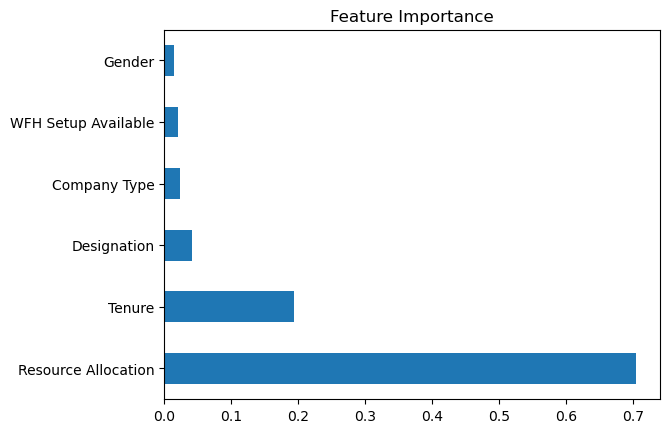

In [75]:
X_import = df_imputed.drop("Burn Rate", axis=1)
y_import = df_imputed["Burn Rate"]
# Train the decision tree regressor
regr = DecisionTreeRegressor(random_state=0)
regr.fit(X_import, y_import)

# Get feature importances
importances = regr.feature_importances_

# Plot the feature importances
feat_importances = pd.Series(importances, index=X_import.columns)
feat_importances.nlargest(10).plot(kind='barh', title='Feature Importance')
plt.show()

In [60]:
df_red= df_imputed.drop(["Gender", "Company Type", "WFH Setup Available"], axis=1)
scores = kfold_multiple_ml_algorithms(df_red, "Burn Rate", classifiers, 5)

results = pd.DataFrame(scores).T
results.reset_index(inplace=True)
results.rename(columns={"index": "Classifier"}, inplace=True)

In [76]:
print(results)

                  Classifier  mean_squared_error  r2_score  \
0           LinearRegression            0.012449  0.666542   
1      DecisionTreeRegressor            0.011537  0.691000   
2        KNeighborsRegressor            0.016688  0.552911   
3      RandomForestRegressor            0.011244  0.698847   
4  GradientBoostingRegressor            0.011229  0.699233   
5               XGBRegressor            0.016790  0.550235   
6                      Lasso            0.012613  0.662157   
7                 ElasticNet            0.012457  0.666324   
8                        SVR            0.011378  0.695272   

   mean_absolute_percentage_error  
0                    1.069796e+13  
1                    9.376787e+12  
2                    9.596567e+12  
3                    9.337040e+12  
4                    9.182359e+12  
5                    1.003995e+13  
6                    1.154923e+13  
7                    1.089836e+13  
8                    9.008468e+12  


We try to drop the gender, company type, WFH setup to see how the model works. The R^2 drops by less than 1%, so even if we dropped the variables 

In [78]:
import plotly.express as px
import plotly.io as pio
import plotly.graph_objs as go

In [79]:
fig_acc = px.line(results, x='Classifier', y='r2_score', title='R^2 scores')
fig_acc.show()
pio.write_html(fig_acc, file='R2Scores.html',auto_open=True)

In [80]:
fig = px.scatter(results, x="mean_squared_error", y="r2_score", symbol="Classifier", title= "MSE & R^2 scores")
fig.show()
pio.write_html(fig, file='R2MSEScores.html',auto_open=True)

Given that our highest performing model is Gradient Boosting Regression, we will use it to predict and visualize how predicts do compared to actual data

In [88]:
from sklearn.model_selection import train_test_split
X = df_red.drop('Burn Rate', axis=1)
y = df_red['Burn Rate']

#train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#model training
gbr= GradientBoostingRegressor(max_depth=36, min_samples_split=0.15143814974272138,
                          n_estimators=140)
y_pred = gbr.fit(X_train, y_train).predict(X_test)

fig_r = px.scatter(x=y_test, y=y_pred, labels={'x': 'Actual', 'y': 'Predicted'})
fig_r.update_layout(title='Actual vs Predicted', xaxis_title='Actual', yaxis_title='Predicted')
fig_r.show()
pio.write_html(fig_r, file='ActualvsPredicted.html',auto_open=True)
"""
#visualize actual vs predicted
fig_r = px.scatter(x=y_test, y=y_pred, labels={'x': 'Actual', 'y': 'Predicted'})
fig_r.update_layout(title='Actual vs Predicted', xaxis_title='Actual', yaxis_title='Predicted')
fig_r.show()
pio.write_html(fig_r, file='Actual vs Predicted',auto_open=True)
"""


"\n#visualize actual vs predicted\nfig_r = px.scatter(x=y_test, y=y_pred, labels={'x': 'Actual', 'y': 'Predicted'})\nfig_r.update_layout(title='Actual vs Predicted', xaxis_title='Actual', yaxis_title='Predicted')\nfig_r.show()\npio.write_html(fig_r, file='Actual vs Predicted',auto_open=True)\n"

# CONCLUSIONS

Data Limitations:

As discussed earlier, there is little known about the data collection methods such as the demographic of the sample space, its randomness, and some specifities that would improve prediciton such as industry. Furthermore, it would have been helpful to determine how the quantifiable metrics were collected, ie how is the burn rate determined, how about designation? Is it self reported, machine generated or determined by management. The lack of this information decreases the model's application. 

Research Questions:
I set out to determine if the variables I had were best to predicit employee burn rate. While they were not best, I believe they are impactful in making human resource management decisions. I was able to establish the importance of resource allocation (hours spent at work) as a feature in predicting burn rate. On average the people who work longer experience more burn rate. There is also a positive relationship between designation of work and the resource allocarion, even though there is also a lot of variability in the data points. Another notable feature is the work from home setup available to the employees: there is a smaller edge that employees who have this option have over those who don't when it comes to burn rate.

Proposal:
As far as determining the causes of burnout and prediciting when an employee migt be burnt out, it is better to collect more information than this dataset offered. Things to include might be: field/industry, seniority level of employee, compesation and benefits. 

Given that resource allocation and designation are vital to employee burn rate. It would be best to revise assignment, such that people tasks are equitably divided between workers hence no one is at work longer than they need to be. 
